<blockquote style="background-color: #f8f8f8; padding: 10px; border-left: 5px solid #333; margin: 0;">
    <p style="margin: 0; color: #333;"><strong>Import Required Libraries</strong></p>
</blockquote>


In [26]:
import tensorflow as tf
import keras
from keras import layers,models,datasets, optimizers
import numpy as np
import matplotlib.pyplot as plt

<blockquote style="background-color: #f8f8f8; padding: 10px; border-left: 5px solid #333; margin: 0;">
    <p style="margin: 0; color: #333;"><strong>Load Data</strong></p>
</blockquote>


In [27]:
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

<blockquote style="background-color: #f8f8f8; padding: 10px; border-left: 5px solid #337ab7; margin: 0;">
    <p style="margin: 0; color: #337ab7;"><strong>Normalize Data</strong></p>
</blockquote>


In [28]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

<blockquote style="background-color: #f8f8f8; padding: 10px; border-left: 5px solid #337ab7; margin: 0;">
    <p style="margin: 0; color: #337ab7;"><strong>CNN architecture</strong></p>
</blockquote>


In [29]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,(3, 3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.7),
    layers.Dense(10, activation='softmax')

])

In [30]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy' , metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

<blockquote style="background-color: #f8f8f8; padding: 10px; border-left: 5px solid #337ab7; margin: 0;">
    <p style="margin: 0; color: #337ab7;"><strong>Train the model</strong></p>
</blockquote>


In [31]:
# Train the model using the training data for 20 epochs
history = model.fit(x_train, y_train, epochs =20 , batch_size = 64, validation_split =0.2)

Epoch 1/20
625/625 [==============================] - 32s 42ms/step - loss: 1.9206 - accuracy: 0.2772 - val_loss: 1.5118 - val_accuracy: 0.4656
Epoch 2/20
625/625 [==============================] - 26s 42ms/step - loss: 1.5829 - accuracy: 0.4224 - val_loss: 1.3361 - val_accuracy: 0.5289
Epoch 3/20
625/625 [==============================] - 25s 40ms/step - loss: 1.4570 - accuracy: 0.4737 - val_loss: 1.2428 - val_accuracy: 0.5596
Epoch 4/20
625/625 [==============================] - 25s 40ms/step - loss: 1.3703 - accuracy: 0.5071 - val_loss: 1.1617 - val_accuracy: 0.5975
Epoch 5/20
625/625 [==============================] - 24s 39ms/step - loss: 1.3128 - accuracy: 0.5301 - val_loss: 1.1081 - val_accuracy: 0.6071
Epoch 6/20
625/625 [==============================] - 26s 41ms/step - loss: 1.2565 - accuracy: 0.5483 - val_loss: 1.1079 - val_accuracy: 0.5987
Epoch 7/20
625/625 [==============================] - 26s 41ms/step - loss: 1.2151 - accuracy: 0.5619 - val_loss: 1.0154 - val_accuracy:

<blockquote style="background-color: #f8f8f8; padding: 10px; border-left: 5px solid #337ab7; margin: 0;">
    <p style="margin: 0; color: #337ab7;"><strong>plot training and validation loss </strong></p>
</blockquote>


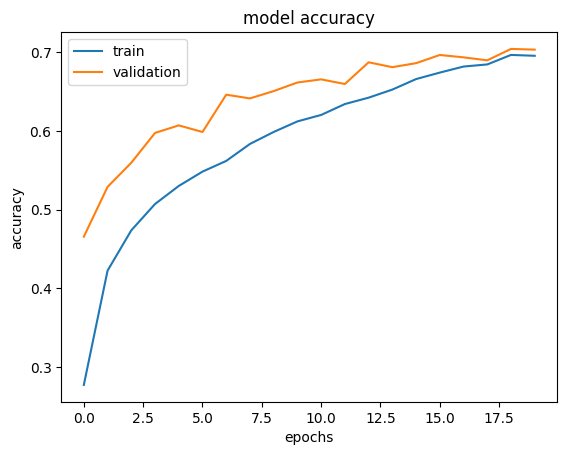

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
     

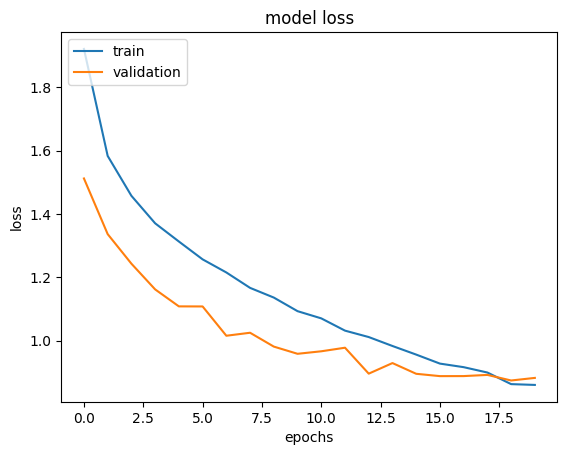

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

<blockquote style="background-color: #f8f8f8; padding: 10px; border-left: 5px solid #337ab7; margin: 0;">
    <p style="margin: 0; color: #337ab7;"><strong>Evaluate the Model </strong></p>
</blockquote>


<blockquote style="background-color: #f8f8f8; padding: 10px; border-left: 5px solid #333; ">
    <p style="margin: 0; font-size: 14px; color: #333;"><strong>Train/Test Accuracy</strong></p>
</blockquote>


In [35]:

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")
     

313/313 [==============================] - 3s 8ms/step - loss: 0.9062 - accuracy: 0.6969
Test accuracy: 0.6969000101089478


 <blockquote style="background-color: #f8f8f8; padding: 10px; border-left: 5px solid #333; ">
    <p style="margin: 0; font-size: 14px; color: #333;"><strong>confusion matrix</strong></p>
</blockquote>

313/313 [==============================] - 2s 7ms/step


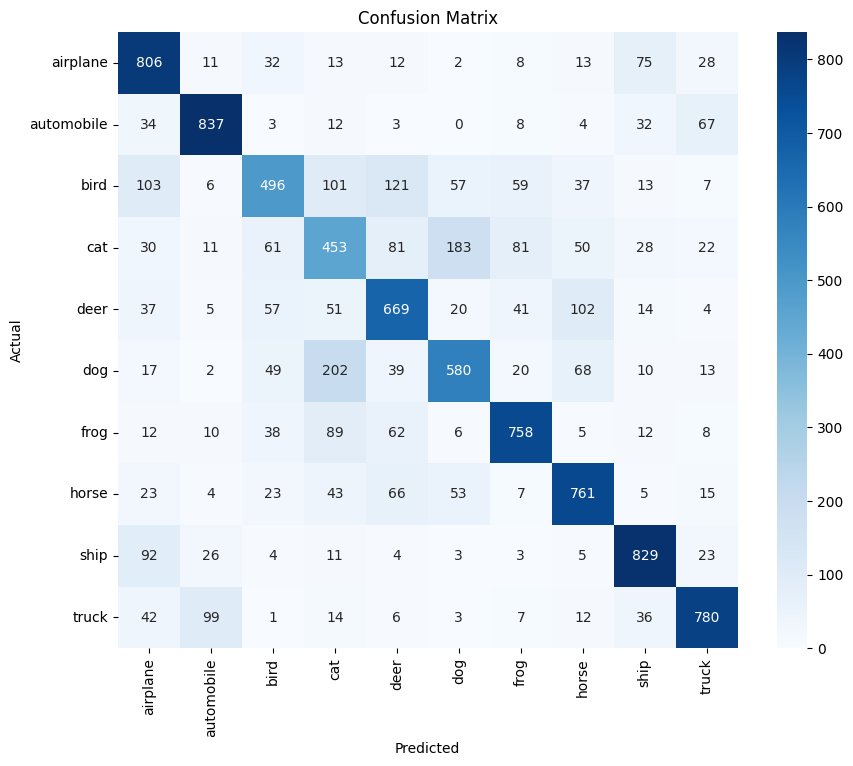

In [37]:
y_pred  =model.predict(x_test)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
y_pred_classes = np.argmax(y_pred, axis=1)
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


 <blockquote style="background-color: #f8f8f8; padding: 10px; border-left: 5px solid #333; ">
    <p style="margin: 0; font-size: 14px; color: #333;"><strong>precision and recall</strong></p>
</blockquote>

In [38]:
from sklearn.metrics import precision_score, recall_score
#since we're doing multi class classification 'weighted' is used
precision = precision_score(y_test, y_pred_classes, average= 'weighted')
recall = recall_score(y_test, y_pred_classes, average= 'weighted')
print(f'precision :{precision}')
print(f'recall :{recall}')

precision :0.6955101959336238
recall :0.6969


 <blockquote style="background-color: #f8f8f8; padding: 10px; border-left: 5px solid #333; ">
    <p style="margin: 0; font-size: 14px; color: #333;"><strong>Plot training and validation loss for with respect to epoch for different learning rates
such as 0.0001, 0.001, 0.01, and 0.1.</strong></p>
</blockquote>

Lets create empty lists to store values losses 

In [60]:
train_losses = []
val_losses = []

Lets append the values for 0.00

In [61]:

train_loss_for_lr_001 = history.history['loss']
val_loss_for_lr_001 = history.history['val_loss']

<blockquote style="background-color: #f8f8f8; padding: 10px; border-left: 5px solid #337ab7; margin: 0;">
    <p style="margin: 0; color: #337ab7;"><strong>for learning rate 0.1 </strong></p>
</blockquote>

In [62]:

model.compile(optimizer= optimizers.Adam(learning_rate=0.1),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
train_losses.append(history.history['loss'])
val_losses.append(history.history['val_loss'])

Epoch 1/20
625/625 [==============================] - 25s 36ms/step - loss: 2.3116 - accuracy: 0.0980 - val_loss: 2.3097 - val_accuracy: 0.0977
Epoch 2/20
625/625 [==============================] - 22s 34ms/step - loss: 2.3109 - accuracy: 0.0982 - val_loss: 2.3112 - val_accuracy: 0.0997
Epoch 3/20
625/625 [==============================] - 22s 35ms/step - loss: 2.3118 - accuracy: 0.0974 - val_loss: 2.3072 - val_accuracy: 0.1022
Epoch 4/20
625/625 [==============================] - 22s 35ms/step - loss: 2.3120 - accuracy: 0.0982 - val_loss: 2.3127 - val_accuracy: 0.0980
Epoch 5/20
625/625 [==============================] - 22s 36ms/step - loss: 2.3119 - accuracy: 0.0996 - val_loss: 2.3098 - val_accuracy: 0.1022
Epoch 6/20
625/625 [==============================] - 22s 36ms/step - loss: 2.3115 - accuracy: 0.1023 - val_loss: 2.3149 - val_accuracy: 0.0997
Epoch 7/20
625/625 [==============================] - 22s 35ms/step - loss: 2.3107 - accuracy: 0.0991 - val_loss: 2.3131 - val_accuracy:

In [63]:
train_losses.append(train_loss_for_lr_001)
val_losses.append(val_loss_for_lr_001)

<blockquote style="background-color: #f8f8f8; padding: 10px; border-left: 5px solid #337ab7; margin: 0;">
    <p style="margin: 0; color: #337ab7;"><strong>for learning rate 0.001 </strong></p>
</blockquote>

In [64]:

model.compile(optimizer= optimizers.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
train_losses.append(history.history['loss'])
val_losses.append(history.history['val_loss'])

Epoch 1/20
625/625 [==============================] - 27s 39ms/step - loss: 2.3062 - accuracy: 0.0966 - val_loss: 2.3033 - val_accuracy: 0.0980
Epoch 2/20
625/625 [==============================] - 22s 35ms/step - loss: 2.3029 - accuracy: 0.0967 - val_loss: 2.3027 - val_accuracy: 0.0977
Epoch 3/20
625/625 [==============================] - 21s 34ms/step - loss: 2.3028 - accuracy: 0.0995 - val_loss: 2.3027 - val_accuracy: 0.0977
Epoch 4/20
625/625 [==============================] - 21s 34ms/step - loss: 2.3027 - accuracy: 0.0972 - val_loss: 2.3027 - val_accuracy: 0.0997
Epoch 5/20
625/625 [==============================] - 22s 34ms/step - loss: 2.3027 - accuracy: 0.0962 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 6/20
625/625 [==============================] - 22s 35ms/step - loss: 2.3027 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.0952
Epoch 7/20
625/625 [==============================] - 22s 35ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3028 - val_accuracy:

 Adam optimizer without specifying a learning rate, the default learning rate is generally set to 0.001.
 so we already find it and append it

<blockquote style="background-color: #f8f8f8; padding: 10px; border-left: 5px solid #337ab7; margin: 0;">
    <p style="margin: 0; color: #337ab7;"><strong>for learning rate 0.0001 </strong></p>
</blockquote>

In [65]:

model.compile(optimizer= optimizers.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
train_losses.append(history.history['loss'])
val_losses.append(history.history['val_loss'])

Epoch 1/20
625/625 [==============================] - 44s 64ms/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 2/20
625/625 [==============================] - 29s 47ms/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 3/20
625/625 [==============================] - 24s 38ms/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 4/20
625/625 [==============================] - 26s 41ms/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 5/20
625/625 [==============================] - 24s 39ms/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 6/20
625/625 [==============================] - 24s 39ms/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 7/20
625/625 [==============================] - 25s 40ms/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3027 - val_accuracy:

<blockquote style="background-color: #f8f8f8; padding: 10px; border-left: 5px solid #337ab7; margin: 0;">
    <p style="margin: 0; color: #337ab7;"><strong>Plot for different learning rates
such as 0.0001, 0.001, 0.01, and 0.1. </strong></p>
</blockquote>

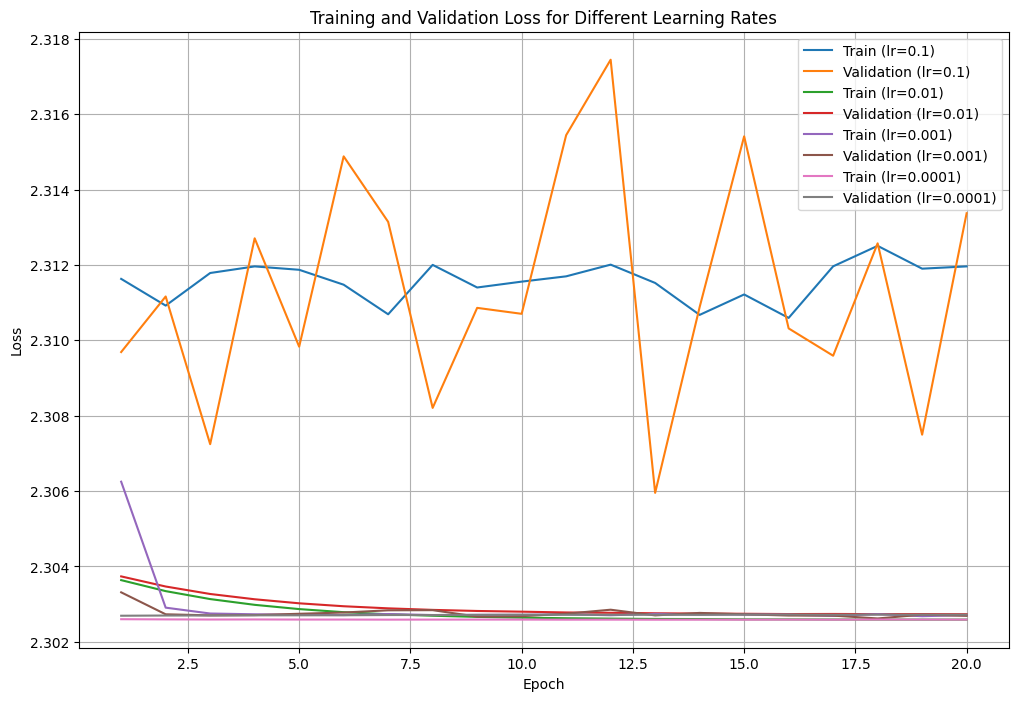

In [66]:

learning_rates = [0.1, 0.01, 0.001, 0.0001]
plt.figure(figsize=(12, 8))
for i, lr in enumerate(learning_rates):
    plt.plot(range(1, 21), train_losses[i], label=f'Train (lr={lr})')
    plt.plot(range(1, 21), val_losses[i], label=f'Validation (lr={lr})')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()